In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [63]:



df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")


## Explore the Data

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [66]:
df.shape


(10002, 14)

In [67]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [68]:
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [69]:
df.Gender.value_counts()

Gender
Male      5458
Female    4544
Name: count, dtype: int64

In [70]:
df.HasCrCard.value_counts()

HasCrCard
1.0    7056
0.0    2945
Name: count, dtype: int64

In [71]:
df.IsActiveMember.value_counts()

IsActiveMember
1.0    5150
0.0    4851
Name: count, dtype: int64

In [72]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [73]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

## Preprocessing

In [74]:
if 1 in (df.isnull().sum().values):
    df = df.dropna(axis=0)
    
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [75]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Delete the columns which are not required (RowNumber & Surname)

In [76]:
if "RowNumer" in df.columns:
    df.drop("RowNumber", axis=1, inplace=True)
    


In [77]:
if "Surname" in df.columns:
    df.drop("Surname", axis=1, inplace=True)

/tmp/ipykernel_37/495643656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Surname", axis=1, inplace=True)


#### Label Encoding for Categorical Variables: 
###### Convert categorical columns to numerical values for model training

In [78]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("categorical columns:", categorical_cols)

categorical columns: Index(['Geography', 'Gender'], dtype='object')


In [79]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head(10)

/tmp/ipykernel_37/3072472425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
/tmp/ipykernel_37/3072472425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,376,1,0,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,528,0,1,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,497,2,1,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,476,0,0,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,549,0,0,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [80]:
df["Geography"].unique()

array([0, 2, 1])

In [81]:
df.to_excel('Bank_Data.xlsx', sheet_name='Data')

##### Scale all the numerical features to a range b/w 0 & 1 to ensure that all features are on a comparable scale

In [82]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#### Correlation Matrix
##### To identify correlations b/w features and the target variable.

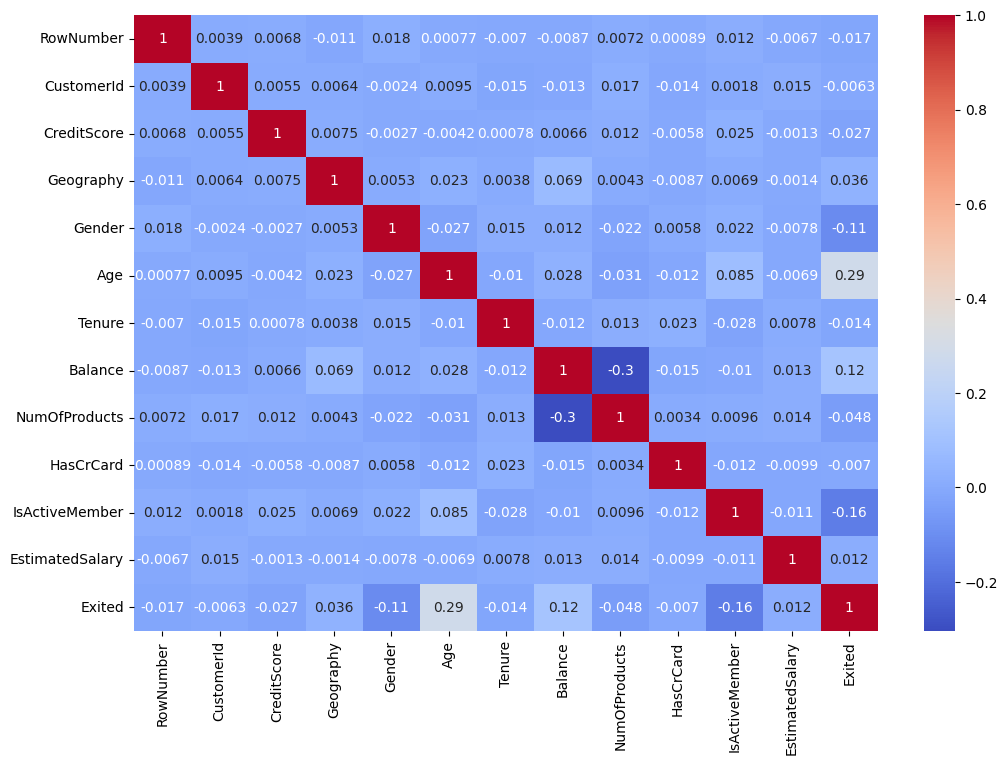

In [83]:
corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
plt.show()


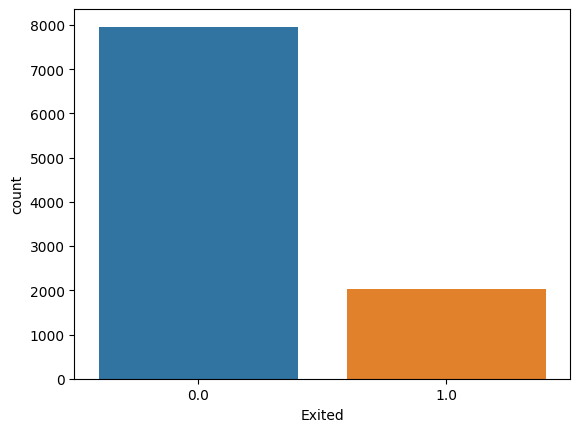

In [84]:
# Plot Churn distribution
sns.countplot(x='Exited', data=df)
# plt.title('Churn Distribution')
plt.show()


#### Box Plot by Exited

<Figure size 1200x600 with 0 Axes>

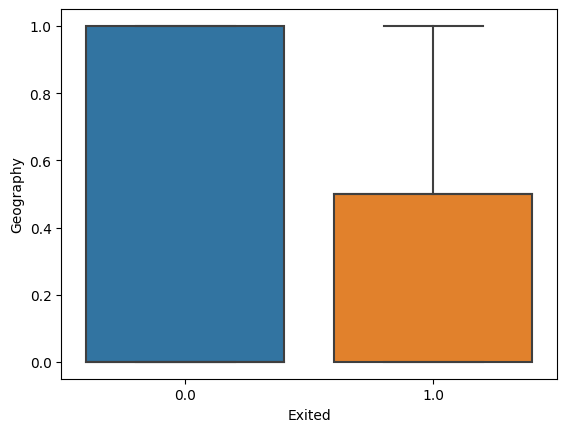

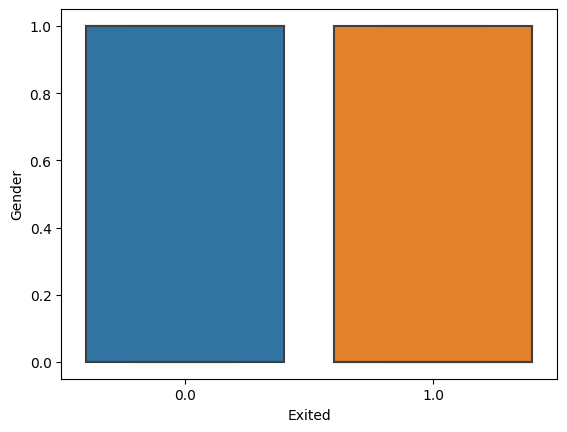

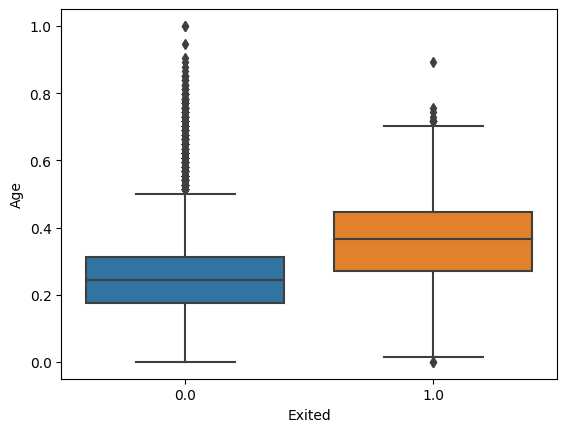

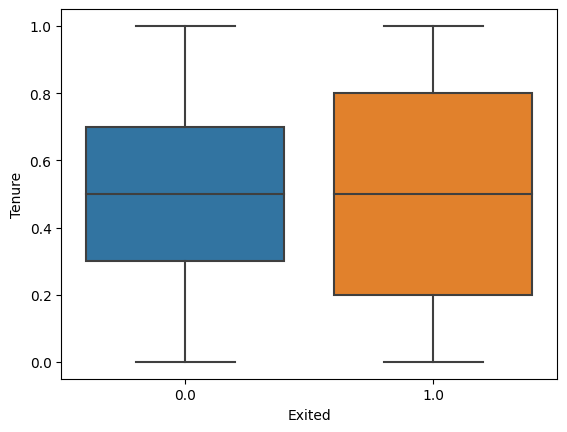

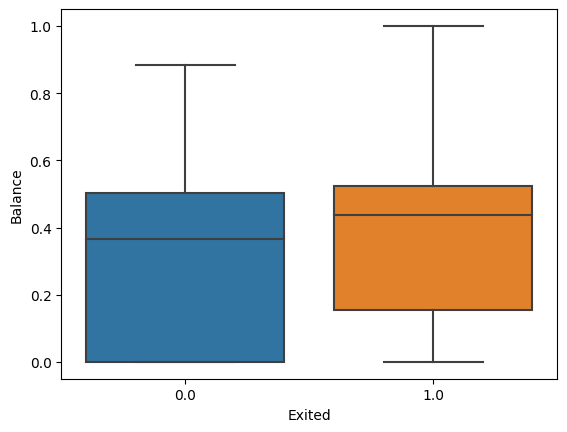

In [85]:
numeric_cols = ['Geography', 'Gender', 'Age', 'Tenure', 'Balance']

plt.figure(figsize=(12,6))
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title=(f'box plot of {col} by Exited')
    plt.show()
               

#### Feature Distribution (Histogram)
##### To see the distribution of important features which can help identify skewness or outliers.

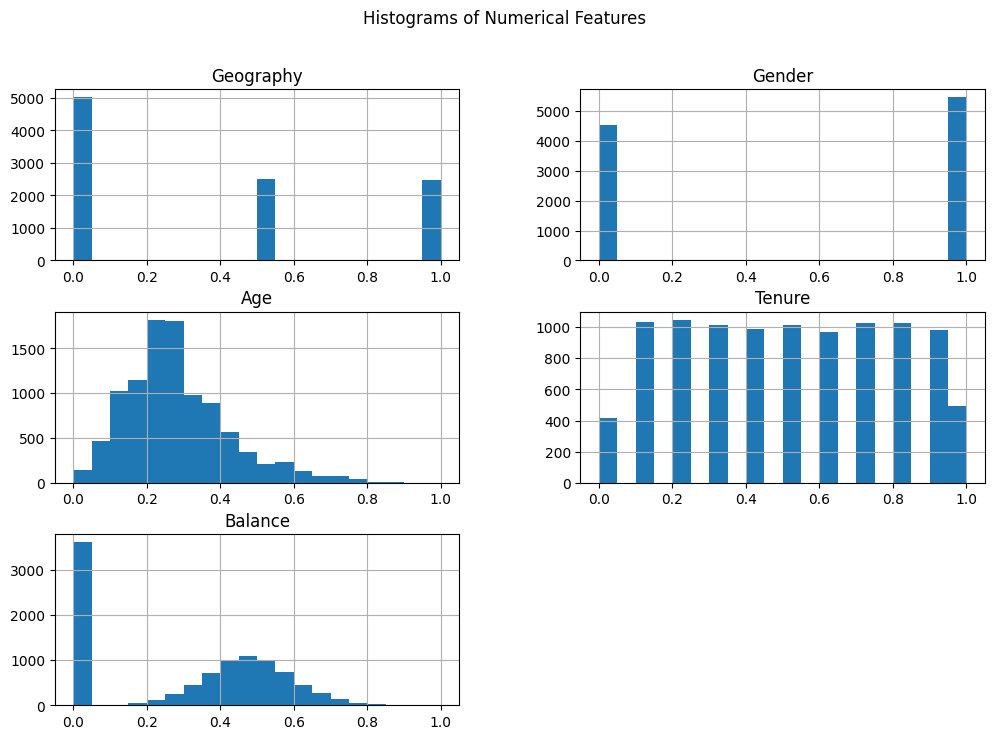

In [86]:
# Plot histograms for numerical features
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()


#### Export the data into Excel file for Visualization

In [87]:
# df.to_excel('Bank_Data.xlsx', sheet_name='Data')

#### Split Data

In [88]:
x = df.drop("Exited", axis=1)
y = df['Exited']

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### build the Model and train it

##### Experimenting with few models to see which performs the best

#### Logistic Regression

In [90]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
# logreg = LogisticRegression()

In [92]:
# logreg.fit(x_train, y_train)

In [93]:
# y_pred_logreg = logreg.predict(x_test)

In [94]:
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
# print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

## Random Forest Model (with Hyperparameter Tuning) (Used here)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [96]:
rf = RandomForestClassifier( random_state=42)

In [97]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [98]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)


In [99]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [100]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [101]:
best_rf = grid_search.best_estimator_

In [102]:
y_pred_rf_tuned = best_rf.predict(x_test)

In [103]:
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))


Tuned Random Forest Accuracy: 0.866


#### Decision Tree

In [104]:
# from sklearn.tree import DecisionTreeClassifier

In [105]:
# dt = DecisionTreeClassifier(random_state=42, max_depth = 5)

In [106]:
# dt.fit(x_train, y_train)

In [107]:
# y_pred_dt = dt.predict(x_test)

In [108]:
# print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
# print("Classification Report:\n", classification_report(y_test, y_pred_dt))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

#### XGBoost

In [109]:
# import xgboost as xgb

In [110]:
# xgb_model = xgb.XGBClassifier(random_state=42)

In [111]:
# xgb_model.fit(x_train, y_train)

In [112]:
# y_pred_xgb = xgb_model.predict(x_test)

In [113]:
# print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

#### Neural Network

In [114]:
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.metrics import roc_auc_score

In [115]:
# model = Sequential()

In [116]:
# model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))  # Input layer
# model.add(Dense(64, activation='relu'))  # Hidden layer
# model.add(Dense(32, activation='relu'))  # Hidden layer
# model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

In [117]:
# model.compile(optimizer='adam', 
#              loss = 'binary_crossentropy',
#              metrics = ['accuracy'])

In [118]:
# model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.3)

In [119]:
# y_pred_nn = model.predict(x_test).astype(int) # Convert probabilities to binary values

In [120]:
# print("ROC: ", roc_auc_score(y_test, y_pred_nn))

In [121]:
# print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
# print("Classification Report:\n", classification_report(y_test, y_pred_nn))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

##### Accuracy comparison:

##### Logistic Regression: 0.805
##### **Random Forest:** **0.866**
##### Decision Tree: 0.855
##### XGBoost: 0.847
##### Neural Network: (Epochs:20): 0.824


#### A/B Testing

* ##### Hypthesis: Offering a personalized retention strategy (e.g., special offers or targeted messages) to customers predicted to churn will reduce the churn rate.
* ##### Control Group (A): Customers predicted to churn but receive no intervention.

* ##### Treatment Group (B): Customers predicted to churn and receive the intervention.

In [123]:
churn_pred_customers = df[df['Exited'] == 1]

In [124]:
# Randomly split the churn-prone customers into two groups (Control and Treatment)
churn_pred_customers['Group'] = np.random.choice(['Control', 'Treatment'], size=len(churn_pred_customers), p=[0.5, 0.5])

/tmp/ipykernel_37/4090259357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_pred_customers['Group'] = np.random.choice(['Control', 'Treatment'], size=len(churn_pred_customers), p=[0.5, 0.5])


##### Assuming here that the "Treatment" group receives a retention effort, while the "Control" group does not.

In [125]:
# Simulating reduced churn rate in the treatment group (for demonstration purposes)
churn_pred_customers.loc[churn_pred_customers['Group'] == 'Treatment', 'Actual_Churn'] = np.random.choice([0, 1], size=len(churn_pred_customers[churn_pred_customers['Group'] == 'Treatment']), p=[0.7, 0.3])
churn_pred_customers.loc[churn_pred_customers['Group'] == 'Control', 'Actual_Churn'] = np.random.choice([0, 1], size=len(churn_pred_customers[churn_pred_customers['Group'] == 'Control']), p=[0.5, 0.5])


/tmp/ipykernel_37/1420638946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_pred_customers.loc[churn_pred_customers['Group'] == 'Treatment', 'Actual_Churn'] = np.random.choice([0, 1], size=len(churn_pred_customers[churn_pred_customers['Group'] == 'Treatment']), p=[0.7, 0.3])


In [126]:
control_churn_rate = churn_pred_customers[churn_pred_customers['Group'] == 'Control']['Actual_Churn'].mean()
treatment_churn_rate = churn_pred_customers[churn_pred_customers['Group'] == 'Treatment']['Actual_Churn'].mean()

print(f"Control Group Churn Rate: {control_churn_rate}")
print(f"Treatment Group Churn Rate: {treatment_churn_rate}")


Control Group Churn Rate: 0.48618219037871035
Treatment Group Churn Rate: 0.29783223374175305
